In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv('./Global Electricity Statistics.csv')
df

,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,net generation,Africa,6.683,7.65,8.824,9.615,10.537,11.569,12.214,...,53.9845,56.3134,60.39972,64.68244,66.75504,71.49546,72.10903,76.685,72.73591277,77.53072719
1,Angola,net generation,Africa,0.905,0.906,0.995,1.028,1.028,1.028,1.088,...,6.03408,7.97606,9.21666,9.30914,10.203511,10.67604,12.83194,15.4,16.6,16.429392
2,Benin,net generation,Africa,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.04612,0.08848,0.22666,0.31056,0.26004,0.3115,0.19028,0.2017,0.22608,0.24109728
3,Botswana,net generation,Africa,0.443,0.502,0.489,0.434,0.445,0.456,0.538,...,0.33,0.86868,2.17628,2.79104,2.52984,2.8438,2.97076,3.0469,2.05144,2.18234816
4,Burkina Faso,net generation,Africa,0.098,0.108,0.115,0.117,0.113,0.115,0.122,...,0.86834,0.98268,1.11808,1.43986,1.5509,1.64602,1.6464,1.72552,1.647133174,1.761209666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Trinidad and Tobago,distribution losses,Central & South America,0.244,0.21,0.152,0.326,0.36,0.407,0.337,...,0.239,0.234,0.245,0.248,0.253,0.274864,0.425807,0.424101,0.422757,0.422757
1606,Turks and Caicos Islands,distribution losses,Central & South America,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,...,0,0,0,0,0,0.014,0.0125,0.0125,0.0125,0.01277172
1607,U.S. Virgin Islands,distribution losses,Central & South America,0.05243,0.05537,0.05607,0.05761,0.05789,0.05922,0.06055,...,0.063,0.06,0.06,0.06,0.065,0.065,0.05,0.051,0.051,0.051
1608,Uruguay,distribution losses,Central & South America,0.55,0.426,0.627,0.662,0.78,0.702,0.911,...,1.292,1.282,1.253,1.49,1.608,1.694491,1.557257,1.322331,1.129273,1.129273


## DATA PREPARATION

In [90]:
table = df.melt(id_vars=['Country', 'Features', 'Region'], 
                                  var_name='Year', 
                                  value_name='Value')

In [91]:
table

,Country,Features,Region,Year,Value
0,Algeria,net generation,Africa,1980,6.683
1,Angola,net generation,Africa,1980,0.905
2,Benin,net generation,Africa,1980,0.005
3,Botswana,net generation,Africa,1980,0.443
4,Burkina Faso,net generation,Africa,1980,0.098
...,...,...,...,...,...
67615,Trinidad and Tobago,distribution losses,Central & South America,2021,0.422757
67616,Turks and Caicos Islands,distribution losses,Central & South America,2021,0.01277172
67617,U.S. Virgin Islands,distribution losses,Central & South America,2021,0.051
67618,Uruguay,distribution losses,Central & South America,2021,1.129273


In [103]:
table[['Value']] = table[['Value']].apply(pd.to_numeric, errors='coerce')

## AFGHANISTAN

In [98]:
# table.columns = table.columns.str.strip()
afghanistan_data = table[table['Country'].str.strip() == 'Afghanistan']
afghanistan_data

,Country,Features,Region,Year,Value
115,Afghanistan,net generation,Asia & Oceania,1980,0.942000
345,Afghanistan,net consumption,Asia & Oceania,1980,0.876060
575,Afghanistan,imports,Asia & Oceania,1980,0.000000
805,Afghanistan,exports,Asia & Oceania,1980,0.000000
1035,Afghanistan,net imports,Asia & Oceania,1980,0.000000
...,...,...,...,...,...
66585,Afghanistan,imports,Asia & Oceania,2021,5.368357
66815,Afghanistan,exports,Asia & Oceania,2021,0.000000
67045,Afghanistan,net imports,Asia & Oceania,2021,5.368357
67275,Afghanistan,installed capacity,Asia & Oceania,2021,0.776400


In [99]:
afghanistan_data = afghanistan_data.groupby(['Country','Year'],)[['Value']].mean()
afghanistan_data

Value
Country     Year          
Afghanistan 1980  0.322571
            1981  0.344429
            1982  0.333000
            1983  0.350000
            1984  0.355429
            1985  0.362571
            1986  0.391429
            1987  0.417857
            1988  0.378429
            1989  0.381714
            1990  0.384286
            1991  0.406714
            1992  0.322429
            1993  0.306857
            1994  0.316571
            1995  0.295714
            1996  0.274286
            1997  0.255714
            1998  0.244571
            1999  0.214571
            2000  0.234429
            2001  0.283143
            2002  0.309286
            2003  0.381000
            2004  0.368143
            2005  0.386714
            2006  0.497714
            2007  0.604714
            2008  0.604727
            2009  0.847896
            2010  1.026110
            2011  1.264539
            2012  1.652014
            2013  1.950414
            2014  2.004871
            2015  2.041500
            2016  2.294643
            2017  2.428403
            2018  2.579323
            2019  2.522540
            2020  2.549514
            2021  2.648523

## TAIWAN

In [106]:
taiwan_data = table[table['Country'].str.strip() == 'Taiwan']
taiwan_data

,Country,Features,Region,Year,Value
155,Taiwan,net generation,Asia & Oceania,1980,42.013000
385,Taiwan,net consumption,Asia & Oceania,1980,39.227000
615,Taiwan,imports,Asia & Oceania,1980,0.000000
845,Taiwan,exports,Asia & Oceania,1980,0.000000
1075,Taiwan,net imports,Asia & Oceania,1980,0.000000
...,...,...,...,...,...
66625,Taiwan,imports,Asia & Oceania,2021,0.000000
66855,Taiwan,exports,Asia & Oceania,2021,0.000000
67085,Taiwan,net imports,Asia & Oceania,2021,0.000000
67315,Taiwan,installed capacity,Asia & Oceania,2021,59.371930


In [107]:
taiwan_data = taiwan_data.groupby(['Country','Year'],)[['Value']].mean()
taiwan_data


Value
Country Year           
Taiwan  1980  13.376571
        1981  13.352143
        1982  14.208275
        1983  15.680580
        1984  17.003129
        1985  17.915114
        1986  19.792181
        1987  21.637979
        1988  23.757869
        1989  25.898546
        1990  27.776598
        1991  30.603072
        1992  32.542040
        1993  35.042239
        1994  37.218675
        1995  39.676133
        1996  42.332782
        1997  45.062195
        1998  48.834116
        1999  50.976856
        2000  56.414162
        2001  57.489451
        2002  60.888650
        2003  63.995224
        2004  67.186739
        2005  69.855751
        2006  72.386695
        2007  74.740491
        2008  73.581774
        2009  71.426087
        2010  76.537588
        2011  78.015512
        2012  77.523354
        2013  78.046363
        2014  80.143069
        2015  79.642609
        2016  81.458821
        2017  83.063248
        2018  85.063676
        2019  85.220443
        2020  87.127203
        2021  90.470943

## ALGERIA

In [108]:
algeria_data = table[table['Country'].str.strip() == 'Algeria']
algeria_data

,Country,Features,Region,Year,Value
0,Algeria,net generation,Africa,1980,6.683000
230,Algeria,net consumption,Africa,1980,5.915000
460,Algeria,imports,Africa,1980,0.070000
690,Algeria,exports,Africa,1980,0.061000
920,Algeria,net imports,Africa,1980,0.009000
...,...,...,...,...,...
66470,Algeria,imports,Africa,2021,0.501935
66700,Algeria,exports,Africa,2021,0.598533
66930,Algeria,net imports,Africa,2021,-0.096599
67160,Algeria,installed capacity,Africa,2021,21.694000


In [109]:
algeria_data = algeria_data.groupby(['Country','Year'],)[['Value']].mean()
algeria_data

Value
Country Year           
Algeria 1980   2.260143
        1981   2.618857
        1982   2.998429
        1983   3.266571
        1984   3.575000
        1985   3.868429
        1986   4.076714
        1987   4.307714
        1988   4.743857
        1989   4.842571
        1990   5.037000
        1991   5.373714
        1992   5.583000
        1993   5.914143
        1994   6.060429
        1995   6.048714
        1996   6.388571
        1997   6.591571
        1998   7.082571
        1999   7.549714
        2000   7.801149
        2001   8.102183
        2002   8.467154
        2003   8.988754
        2004   9.494446
        2005  10.302257
        2006  10.713149
        2007  11.235657
        2008  12.043520
        2009  12.052429
        2010  14.104157
        2011  15.567237
        2012  17.545014
        2013  18.307543
        2014  19.694220
        2015  21.096126
        2016  21.836011
        2017  23.331989
        2018  23.763866
        2019  25.140714
        2020  24.018689
        2021  25.380389

## BENIN

In [110]:
benin_data = table[table['Country'].str.strip() == 'Benin']
benin_data

,Country,Features,Region,Year,Value
2,Benin,net generation,Africa,1980,0.005000
232,Benin,net consumption,Africa,1980,0.101000
462,Benin,imports,Africa,1980,0.117000
692,Benin,exports,Africa,1980,0.000000
922,Benin,net imports,Africa,1980,0.117000
...,...,...,...,...,...
66472,Benin,imports,Africa,2021,0.646000
66702,Benin,exports,Africa,2021,0.002000
66932,Benin,net imports,Africa,2021,0.644000
67162,Benin,installed capacity,Africa,2021,0.474900


In [111]:
benin_data = benin_data.groupby(['Country','Year'],)[['Value']].mean()
benin_data

Value
Country Year          
Benin   1980  0.053714
        1981  0.061857
        1982  0.074714
        1983  0.081571
        1984  0.072143
        1985  0.075143
        1986  0.074286
        1987  0.080714
        1988  0.081143
        1989  0.087571
        1990  0.093286
        1991  0.100143
        1992  0.115429
        1993  0.116571
        1994  0.126000
        1995  0.126143
        1996  0.141057
        1997  0.141914
        1998  0.138057
        1999  0.160057
        2000  0.193309
        2001  0.210617
        2002  0.217097
        2003  0.257234
        2004  0.282343
        2005  0.296754
        2006  0.306571
        2007  0.319851
        2008  0.373697
        2009  0.434537
        2010  0.491046
        2011  0.490697
        2012  0.513749
        2013  0.521280
        2014  0.506903
        2015  0.587331
        2016  0.590711
        2017  0.614980
        2018  0.658283
        2019  0.593614
        2020  0.409009
        2021  0.413299

## Botswana

In [113]:
Botswana_data = table[table['Country'].str.strip() == 'Botswana']
Botswana_data

,Country,Features,Region,Year,Value
3,Botswana,net generation,Africa,1980,0.44300
233,Botswana,net consumption,Africa,1980,0.41199
463,Botswana,imports,Africa,1980,0.00000
693,Botswana,exports,Africa,1980,0.00000
923,Botswana,net imports,Africa,1980,0.00000
...,...,...,...,...,...
66473,Botswana,imports,Africa,2021,1.83769
66703,Botswana,exports,Africa,2021,0.00000
66933,Botswana,net imports,Africa,2021,1.83769
67163,Botswana,installed capacity,Africa,2021,0.76600


In [114]:
Botswana_data = Botswana_data.groupby(['Country','Year'],)[['Value']].mean()
Botswana_data

Value
Country  Year          
Botswana 1980  0.145571
         1981  0.166714
         1982  0.196571
         1983  0.214571
         1984  0.225429
         1985  0.252143
         1986  0.282857
         1987  0.298857
         1988  0.285714
         1989  0.286571
         1990  0.310429
         1991  0.327571
         1992  0.376143
         1993  0.392571
         1994  0.462143
         1995  0.475857
         1996  0.541429
         1997  0.600143
         1998  0.607286
         1999  0.681143
         2000  0.695766
         2001  0.797114
         2002  0.890783
         2003  1.016446
         2004  1.048794
         2005  1.098137
         2006  1.177857
         2007  1.263571
         2008  1.345714
         2009  1.335000
         2010  1.443880
         2011  1.495391
         2012  1.518429
         2013  1.564051
         2014  1.432366
         2015  1.515440
         2016  1.518954
         2017  1.472371
         2018  1.472697
         2019  1.728359
         2020  1.483136
         2021  1.520538

## GRAPH

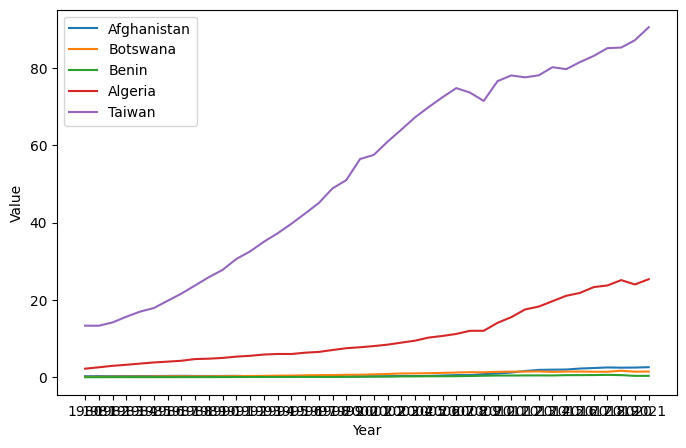

In [117]:
plt.figure(figsize=(8,5))
sns.lineplot(data=afghanistan_data,x='Year',y='Value',label='Afghanistan')
sns.lineplot(data=Botswana_data,x='Year',y='Value',label='Botswana')
sns.lineplot(data=benin_data,x='Year',y='Value',label='Benin')
sns.lineplot(data=algeria_data,x='Year',y='Value',label='Algeria')
sns.lineplot(data=taiwan_data,x='Year',y='Value',label='Taiwan')
plt.legend()
plt.show()

In [64]:
table[['Value']] = table[['Value']].apply(pd.to_numeric, errors='coerce')

table

,Country,Features,Region,Year,Value
0,Algeria,net generation,Africa,1980,6.683000
1,Angola,net generation,Africa,1980,0.905000
2,Benin,net generation,Africa,1980,0.005000
3,Botswana,net generation,Africa,1980,0.443000
4,Burkina Faso,net generation,Africa,1980,0.098000
...,...,...,...,...,...
67615,Trinidad and Tobago,distribution losses,Central & South America,2021,0.422757
67616,Turks and Caicos Islands,distribution losses,Central & South America,2021,0.012772
67617,U.S. Virgin Islands,distribution losses,Central & South America,2021,0.051000
67618,Uruguay,distribution losses,Central & South America,2021,1.129273


In [85]:
table.columns = table.columns.str.strip()
afghanistan_data = table[table['Country'] == 'Afghanistan']
afghanistan_data

,Country,Features,Region,Year,Value


In [83]:
short = table.groupby(['Country','Year'],)[['Value']].mean()
short


Value
Country     Year          
Afghanistan 1980  0.322571
            1981  0.344429
            1982  0.333000
            1983  0.350000
            1984  0.355429
...                    ...
Zimbabwe    2017  3.480882
            2018  3.457087
            2019  3.322097
            2020  3.474003
            2021  3.505650

[9660 rows x 1 columns]

In [87]:
short.to_dict(orient="records")

[{'Value': 0.32257142857142856},
 {'Value': 0.3444285714285714},
 {'Value': 0.333},
 {'Value': 0.35000000000000003},
 {'Value': 0.3554285714285714},
 {'Value': 0.3625714285714286},
 {'Value': 0.3914285714285714},
 {'Value': 0.4178571428571428},
 {'Value': 0.37842857142857145},
 {'Value': 0.3817142857142857},
 {'Value': 0.3842857142857143},
 {'Value': 0.4067142857142857},
 {'Value': 0.32242857142857145},
 {'Value': 0.3068571428571429},
 {'Value': 0.3165714285714286},
 {'Value': 0.2957142857142857},
 {'Value': 0.2742857142857143},
 {'Value': 0.2557142857142857},
 {'Value': 0.24457142857142858},
 {'Value': 0.21457142857142858},
 {'Value': 0.23442857142857143},
 {'Value': 0.28314285714285714},
 {'Value': 0.3092857142857143},
 {'Value': 0.38099999999999995},
 {'Value': 0.36814285714285716},
 {'Value': 0.3867142857142857},
 {'Value': 0.4977142857142857},
 {'Value': 0.6047142857142856},
 {'Value': 0.6047271428571428},
 {'Value': 0.8478957142857143},
 {'Value': 1.02611},
 {'Value': 1.264538571

In [88]:
afghanistan_data = short[short['Country']]
afghanistan_data

KeyError: 'Country'

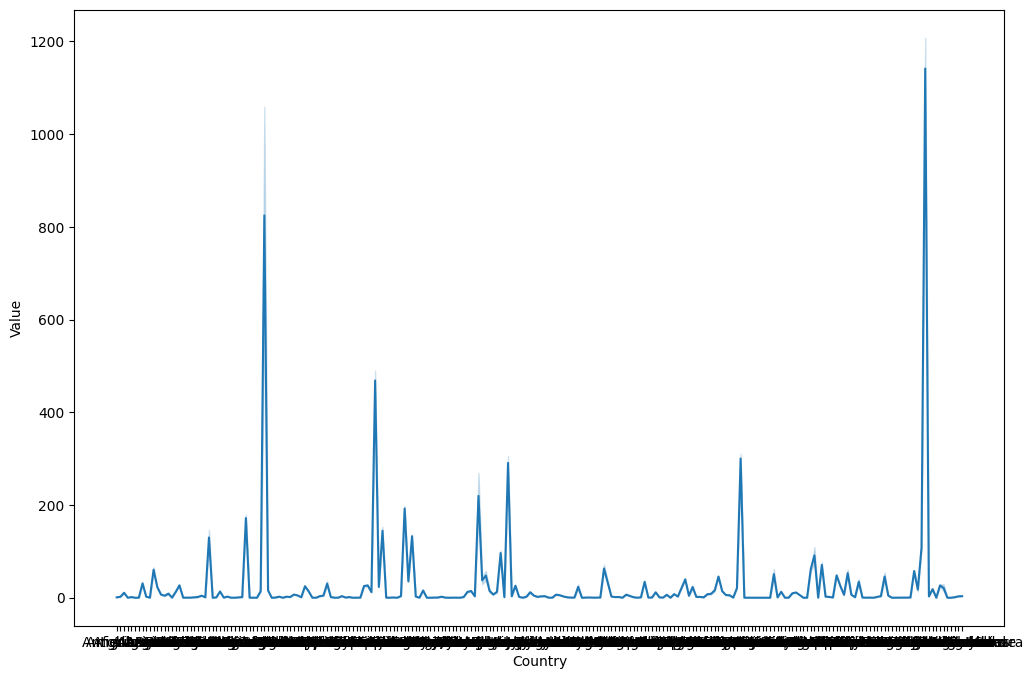

In [82]:
plt.figure(figsize=(12,8))
sns.lineplot(data=short,x='Country',y='Value')
plt.show()